In [244]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

stn_ids = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt', header=None, infer_nrows=1000)
stn_ids.columns = ['ID','LAT','LON','ELEV','UKN','NAME','GSN','WBAN']
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


In [2]:
periods = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt', header=None, infer_nrows=1000)
periods.columns = ['ID','LAT','LON','ELEM','TiMIN','TiMAX']
periods

,ID,LAT,LON,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
767508,ZI000067983,-20.2000,32.6160,PRCP,1951,2025
767509,ZI000067983,-20.2000,32.6160,TAVG,1962,2025
767510,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
767511,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


In [3]:
merged_stns = pd.merge(stn_ids,periods,how='left',left_on='ID',right_on='ID')
merged_stns

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMAX,1949.0,1949.0
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMIN,1949.0,1949.0
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,PRCP,1949.0,1949.0
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNOW,1949.0,1949.0
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNWD,1949.0,1949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767572,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,PRCP,1951.0,2025.0
767573,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,TAVG,1962.0,2025.0
767574,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMAX,1951.0,1990.0
767575,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMIN,1951.0,1990.0


In [11]:
pc_data = merged_stns.iloc[np.where(merged_stns['ID']=='USC00087205')[0]]
pc_data

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
469181,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,TMAX,1892.0,2025.0
469182,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,TMIN,1892.0,2025.0
469183,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,TOBS,1901.0,2025.0
469184,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,PRCP,1893.0,2025.0
469185,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,SNOW,1901.0,2025.0
469186,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,SNWD,1901.0,2025.0
469187,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,DAPR,1949.0,2004.0
469188,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,MDPR,1949.0,2008.0
469189,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,WT01,2008.0,2014.0
469190,USC00087205,28.0208,-82.1392,33.2,FL,PLANT CITY,NaN,NaN,28.0208,-82.1392,WT03,1951.0,2025.0


In [14]:
pc_df = pd.read_csv(
...      "s3://noaa-ghcn-pds/csv/by_station/USC00087205.csv",
...      storage_options={"anon": True},  # passed to `s3fs.S3FileSystem`
         dtype={'Q_FLAG': 'object', 'M_FLAG': 'object'},
         parse_dates=['DATE']
... ).set_index('DATE')

pc_df

/tmp/ipykernel_3674305/272402385.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  pc_df = pd.read_csv(


,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
DATE,,,,,,,
1892-09-01,USC00087205,TMAX,322,NaN,NaN,6,NaN
1892-09-02,USC00087205,TMAX,317,NaN,NaN,6,NaN
1892-09-03,USC00087205,TMAX,317,NaN,NaN,6,NaN
1892-09-04,USC00087205,TMAX,322,NaN,NaN,6,NaN
1892-09-05,USC00087205,TMAX,333,NaN,NaN,6,NaN
...,...,...,...,...,...,...,...
2025-12-04,USC00087205,PRCP,0,NaN,NaN,H,1600.0
2025-12-05,USC00087205,PRCP,0,NaN,NaN,H,1600.0
2025-12-06,USC00087205,PRCP,0,NaN,NaN,H,1600.0


In [15]:
pc_tmin = pc_df.loc[pc_df['ELEMENT'] == 'TMIN']
pc_tmin

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
DATE,,,,,,,
1892-09-01,USC00087205,TMIN,206,NaN,NaN,6,NaN
1892-09-02,USC00087205,TMIN,206,NaN,NaN,6,NaN
1892-09-03,USC00087205,TMIN,211,NaN,NaN,6,NaN
1892-09-04,USC00087205,TMIN,217,NaN,NaN,6,NaN
1892-09-05,USC00087205,TMIN,211,NaN,NaN,6,NaN
...,...,...,...,...,...,...,...
2025-12-04,USC00087205,TMIN,122,NaN,NaN,H,1600.0
2025-12-05,USC00087205,TMIN,178,NaN,NaN,H,1600.0
2025-12-06,USC00087205,TMIN,206,NaN,NaN,H,1600.0


# 1)
Strawberries are planted around October 1 and ready for harvest by the end of January. 
 - October 1 - January 30

What is the MEAN risk of frost and freeze?
- Defined as the mean number of days per month over the period 1991-2020
- Frost temps <= 32 F = 0 C
- Freeze temps <= 28 F = -2.2 C

In [36]:
pc_tmin_yrs = pc_tmin.iloc[np.where((pc_tmin.index.year>=1991)&(pc_tmin.index.year<=2020))[0]]
pc_tmin_sub = pc_tmin_yrs.iloc[np.where((pc_tmin_yrs.index.month>=10)|(pc_tmin_yrs.index.month==1))[0]]
pc_tmin_sub['Year'] = pc_tmin_sub.index.year
pc_tmin_sub['Month'] = pc_tmin_sub.index.month
pc_tmin_sub['ym'] = list(zip(pc_tmin_sub.index.year, pc_tmin_sub.index.month))
pc_tmin_sub['Tmin_corr'] = pc_tmin_sub['DATA_VALUE']/10
pc_tmin_sub

/tmp/ipykernel_3674305/3595140445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_tmin_sub['Year'] = pc_tmin_sub.index.year
/tmp/ipykernel_3674305/3595140445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_tmin_sub['Month'] = pc_tmin_sub.index.month
/tmp/ipykernel_3674305/3595140445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,Year,Month,ym,Tmin_corr
DATE,,,,,,,,,,,
1991-01-01,USC00087205,TMIN,167,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",16.7
1991-01-02,USC00087205,TMIN,183,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",18.3
1991-01-03,USC00087205,TMIN,178,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",17.8
1991-01-04,USC00087205,TMIN,178,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",17.8
1991-01-05,USC00087205,TMIN,172,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",17.2
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,USC00087205,TMIN,11,NaN,NaN,7,1600.0,2020,12,"(2020, 12)",1.1
2020-12-28,USC00087205,TMIN,89,NaN,NaN,7,1600.0,2020,12,"(2020, 12)",8.9
2020-12-29,USC00087205,TMIN,117,NaN,NaN,7,1600.0,2020,12,"(2020, 12)",11.7


In [73]:
frost_df = pc_tmin_sub.iloc[np.where(pc_tmin_sub['Tmin_corr']<=0)[0]]
frost_ym_count = frost_df.groupby(by=['Year', 'Month']).count()['ID']
print(frost_ym_count)
frost_risk = frost_ym_count.groupby(level='Month').mean()
frost_risk

Year  Month
1992  1        3
1993  12       1
1995  12       4
1996  1        2
1997  1        2
1999  1        3
      12       1
2000  1        1
      11       1
      12       2
2001  1        9
2002  1        4
2003  1        4
      12       1
2004  1        1
2005  1        2
2008  1        1
2009  1        4
2010  1        8
      12       8
2011  1        2
2012  1        2
2013  12       1
2014  1        1
2016  1        1
2017  1        1
2018  1        4
2020  1        1
Name: ID, dtype: int64


Month
1     2.800000
11    1.000000
12    2.571429
Name: ID, dtype: float64

In [75]:
frost_risk.iloc[1]

np.float64(1.0)

In [80]:
print('The frost risk is \n' \
'0 in October,\n'
'%f in November,\n'
'%f in December,\n'
'and %f in January ' \
'\n based on the mean number of frost days per month from 1990-2020'%(frost_risk.iloc[1], frost_risk.iloc[2], frost_risk.iloc[0]))

The frost risk is 
0 in October,
1.000000 in November,
2.571429 in December,
and 2.800000 in January 
 based on the mean number of frost days per month from 1990-2020


In [81]:
freeze_df = pc_tmin_sub.iloc[np.where(pc_tmin_sub['Tmin_corr']<=-2.2)[0]]
freeze_ym_count = freeze_df.groupby(by=['Year', 'Month']).count()['ID']
print(freeze_ym_count)
freeze_risk = freeze_ym_count.groupby(level='Month').mean()
freeze_risk

Year  Month
1992  1        1
1995  12       3
1996  1        1
1997  1        1
1999  1        3
2001  1        1
2002  1        1
2003  1        1
2008  1        1
2009  1        1
2010  1        5
      12       3
2014  1        1
2018  1        2
Name: ID, dtype: int64


Month
1     1.583333
12    3.000000
Name: ID, dtype: float64

In [84]:
print('The freeze risk is \n' \
'0 in October,\n'
'0 in November,\n'
'%f in December,\n'
'and %f in January ' \
'\n based on the mean number of freeze days per month from 1990-2020'%(freeze_risk.iloc[1], freeze_risk.iloc[0]))

The freeze risk is 
0 in October,
0 in November,
3.000000 in December,
and 1.583333 in January 
 based on the mean number of freeze days per month from 1990-2020


# 2) Which SST forcing region is most related to cold conditions in central Florida?

Using the temperature anomalies computed in the file, determine which ENSO index (NINO1+2, NINO3, NINO4, and NINO3.4) is best correlated (i.e., has the highest absolute value of Pearson's correlation coefficient) with the number of days per month < 28 degrees F.

In [86]:
import fsspec

In [87]:
# URL of the file
url = "https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices"

In [235]:
df = pd.read_fwf(url, header=None)
good_df = df.iloc[:,1:5]
df_enso = pd.DataFrame(good_df.values[1:].astype(float), columns = ["ANOM12","NINO3","ANOM3", "NINO4"])
df_enso

,ANOM12,NINO3,ANOM3,NINO4
0,-0.24,25.84,0.17,28.01
1,-0.72,26.26,-0.11,27.99
2,-1.38,26.92,-0.25,28.18
3,-1.16,27.52,-0.05,28.61
4,-0.62,27.70,0.49,29.19
...,...,...,...,...
522,0.46,25.92,0.04,28.84
523,0.23,24.97,-0.24,28.63
524,-0.18,24.60,-0.41,28.41
525,-0.04,24.74,-0.35,28.36


In [236]:
df

,0,1,2,3,4,5,6
0,YR MON NINO1+2,ANOM,NINO3,ANOM,NINO4,ANOM NINO3.4,ANOM
1,1982 1 24.28,-0.24,25.84,0.17,28.01,-0.21 26.65,0.08
2,1982 2 25.38,-0.72,26.26,-0.11,27.99,-0.11 26.54,-0.20
3,1982 3 25.22,-1.38,26.92,-0.25,28.18,-0.05 27.09,-0.14
4,1982 4 24.57,-1.16,27.52,-0.05,28.61,0.10 27.83,0.02
...,...,...,...,...,...,...,...
523,2025 7 22.29,0.46,25.92,0.04,28.84,0.05 27.24,-0.06
524,2025 8 21.09,0.23,24.97,-0.24,28.63,-0.06 26.58,-0.33
525,2025 9 20.40,-0.18,24.60,-0.41,28.41,-0.27 26.32,-0.44
526,2025 10 20.83,-0.04,24.74,-0.35,28.36,-0.33 26.29,-0.48


In [237]:
yr = []
mn = []
nino12 = []
anom4 = []
nino34 = []
for n in range(1,len(df[0])):
    yr.append(int(df[0].iloc[n][0:4]))
    mn.append(int(df[0].iloc[n][6:8]))
    nino12.append(float(df[0].iloc[n][-5::]))

    anom4.append(float(df[5][n][0:5]))
    nino34.append(float(df[5][n][-5::]))

In [238]:
df_enso['Year'] = yr
df_enso['Month'] = mn
df_enso["NINO12"] = nino12
df_enso["ANOM4"] = anom4
df_enso["NINO34"] = nino34
df_enso["ANOM34"] = df[6][1::].values.astype(float)
df_enso

,ANOM12,NINO3,ANOM3,NINO4,Year,Month,NINO12,ANOM4,NINO34,ANOM34
0,-0.24,25.84,0.17,28.01,1982,1,24.28,-0.21,26.65,0.08
1,-0.72,26.26,-0.11,27.99,1982,2,25.38,-0.11,26.54,-0.20
2,-1.38,26.92,-0.25,28.18,1982,3,25.22,-0.05,27.09,-0.14
3,-1.16,27.52,-0.05,28.61,1982,4,24.57,0.10,27.83,0.02
4,-0.62,27.70,0.49,29.19,1982,5,24.00,0.40,28.37,0.49
...,...,...,...,...,...,...,...,...,...,...
522,0.46,25.92,0.04,28.84,2025,7,22.29,0.05,27.24,-0.06
523,0.23,24.97,-0.24,28.63,2025,8,21.09,-0.06,26.58,-0.33
524,-0.18,24.60,-0.41,28.41,2025,9,20.40,-0.27,26.32,-0.44
525,-0.04,24.74,-0.35,28.36,2025,10,20.83,-0.33,26.29,-0.48


In [239]:
anom_df = df_enso[['ANOM12','ANOM3','ANOM4', 'ANOM34', 'Year', 'Month']]
anom_df_yrsub = anom_df.iloc[np.where((anom_df['Year']>=1990)&(anom_df['Year']<=2020))[0]]
anom_df_sub = anom_df_yrsub.iloc[np.where((anom_df_yrsub['Month']>=10)|(anom_df_yrsub['Month']==1))[0]]
anom_df_sub

,ANOM12,ANOM3,ANOM4,ANOM34,Year,Month
96,-0.60,-0.40,-0.02,-0.11,1990,1
105,-0.79,-0.17,0.28,0.18,1990,10
106,-0.90,-0.36,0.15,-0.09,1990,11
107,-0.72,-0.08,0.39,0.22,1990,12
108,-0.78,-0.05,0.40,0.33,1991,1
...,...,...,...,...,...,...
455,0.27,0.29,0.85,0.44,2019,12
456,-0.03,0.22,0.94,0.52,2020,1
465,-0.76,-0.90,-0.71,-1.13,2020,10
466,-0.67,-1.03,-0.70,-1.23,2020,11


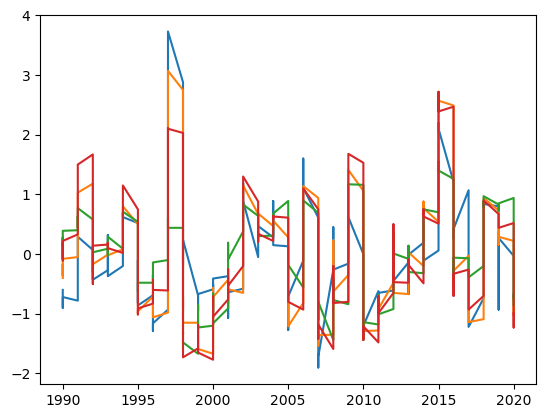

In [249]:
plt.plot(anom_df_sub['Year'],anom_df_sub[['ANOM12','ANOM3','ANOM4', 'ANOM34']])

In [250]:
pc_tmin_sub

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,Year,Month,ym,Tmin_corr
DATE,,,,,,,,,,,
1991-01-01,USC00087205,TMIN,167,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",16.7
1991-01-02,USC00087205,TMIN,183,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",18.3
1991-01-03,USC00087205,TMIN,178,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",17.8
1991-01-04,USC00087205,TMIN,178,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",17.8
1991-01-05,USC00087205,TMIN,172,NaN,NaN,0,1800.0,1991,1,"(1991, 1)",17.2
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,USC00087205,TMIN,11,NaN,NaN,7,1600.0,2020,12,"(2020, 12)",1.1
2020-12-28,USC00087205,TMIN,89,NaN,NaN,7,1600.0,2020,12,"(2020, 12)",8.9
2020-12-29,USC00087205,TMIN,117,NaN,NaN,7,1600.0,2020,12,"(2020, 12)",11.7


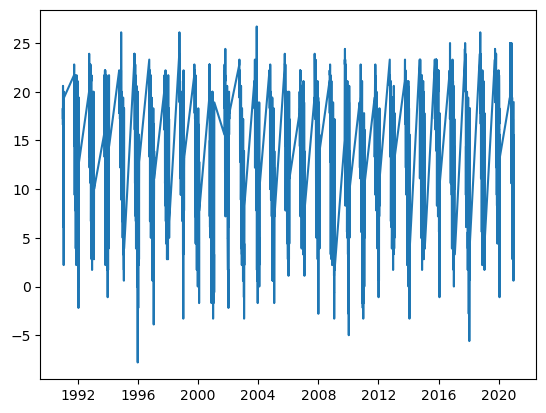

In [251]:
plt.plot(pc_tmin_sub.index, pc_tmin_sub['Tmin_corr'])

In [253]:
freeze_df = pc_tmin_sub.iloc[np.where(pc_tmin_sub['Tmin_corr']<=-2.2)[0]]
freeze_ym_count = freeze_df.groupby(by=['Year', 'Month']).count()['ID']
freeze_risk = freeze_ym_count.groupby(level='Month').mean()
freeze_risk

Month
1     1.583333
12    3.000000
Name: ID, dtype: float64

In [256]:
freeze_ym_count

Year  Month
1992  1        1
1995  12       3
1996  1        1
1997  1        1
1999  1        3
2001  1        1
2002  1        1
2003  1        1
2008  1        1
2009  1        1
2010  1        5
      12       3
2014  1        1
2018  1        2
Name: ID, dtype: int64

In [258]:
anom_df_avg = anom_df_sub.groupby(by=['Year','Month']).mean()

In [262]:
merged_df = pd.merge(freeze_ym_count,anom_df_avg, left_index=True, right_index=True, how='inner')
merged_df=merged_df.rename(columns={'ID': 'Freeze Days'})
merged_df

,,Freeze Days,ANOM12,ANOM3,ANOM4,ANOM34
Year,Month,,,,,
1992,1,1,0.07,1.18,0.58,1.67
1995,12,3,-0.86,-0.96,-0.48,-0.91
1996,1,1,-0.69,-0.71,-0.48,-0.83
1997,1,1,-0.93,-0.98,-0.10,-0.61
1999,1,3,-0.69,-1.15,-1.67,-1.58
2001,1,1,-0.37,-0.43,-0.91,-0.76
2002,1,1,-0.58,-0.65,0.38,-0.20
2003,1,1,-0.05,0.67,0.64,0.88
2008,1,1,-0.26,-1.35,-1.44,-1.59


In [263]:
merged_df.corr()

,Freeze Days,ANOM12,ANOM3,ANOM4,ANOM34
Freeze Days,1.000000,-0.190068,0.091488,0.122470,0.143197
ANOM12,-0.190068,1.000000,0.754584,0.420404,0.591427
ANOM3,0.091488,0.754584,1.000000,0.784927,0.949753
ANOM4,0.122470,0.420404,0.784927,1.000000,0.910583
ANOM34,0.143197,0.591427,0.949753,0.910583,1.000000


The above correlation matrix shows that the ENSO anomolies most strongly related to freeze days in Plant City are the anomolies associated with ENSO1+2 with a correlation of -0.19.